<a href="https://colab.research.google.com/github/abhi-11nav/Car-price-prediction/blob/main/Care_resale_value_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# Importing libraries 

import pandas as pd
import numpy as np


# Importing visualization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [107]:
# Path of raw data uploaded on github 

dataset_link = "https://raw.githubusercontent.com/abhi-11nav/Car-price-prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv.xls"

In [108]:
# Data stored in a variable

dataset = pd.read_csv(dataset_link)

In [109]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [110]:
# Checking for null values in the dataset

dataset.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

There are no null values. We are good to proceed with the dataset

In [111]:
# Let us check for distinct values in the name feature since it appears to be filled with distinct values

(len(dataset.name.value_counts())/dataset.shape[0])*100

34.35483870967742

There are approximately 35% unique values present in the dataset. So, let us eliminate the feature

In [112]:
# Dropping the "name" feature 

dataset.drop('name',axis=1,inplace=True)

In [113]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


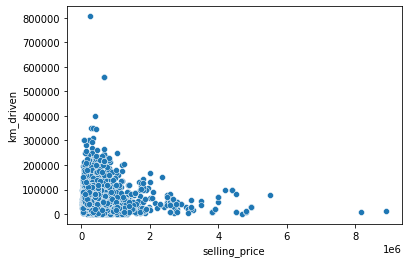

In [114]:
# Checking the realtion between km_driven and sellin_price

sns.scatterplot(dataset['selling_price'], dataset['km_driven'])

Well, it seems to have a linear relation. 

# DO PEARSON R FOR CORREALTION

In [115]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [116]:
# Seperating the features and labels

X = dataset.drop('selling_price',axis=1)

y = dataset['selling_price']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


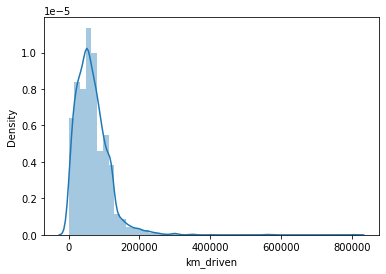

In [117]:
sns.distplot(dataset['km_driven'])

The data is skewed to the right

In [118]:
# We are going to do a log transformation on km_driven variable to scale it down and bring it to a normal distribution 

# Checking if any data value in this feature is <= 0 since we cannot apply log transformation to value less than or equal to 0 

val = 0

for data_point in X['km_driven']:
  if data_point <= 0:
    val += 1
if val!=0:
  print("The feature has data points that are less than or equal to 0")


X['km_driven'] = np.log(X['km_driven'])

In [119]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,11.156251,Petrol,Individual,Manual,First Owner
1,2007,10.819778,Petrol,Individual,Manual,First Owner
2,2012,11.512925,Diesel,Individual,Manual,First Owner
3,2017,10.736397,Petrol,Individual,Manual,First Owner
4,2014,11.856515,Diesel,Individual,Manual,Second Owner


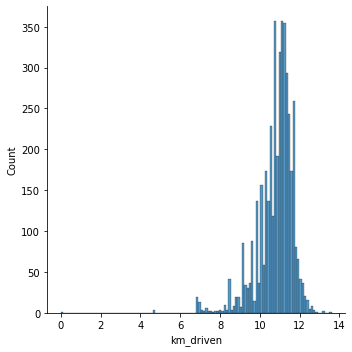

In [120]:
# Checking for distribution again 

sns.displot(X["km_driven"])

The dataset seems to be skewed to the right. Let us check for outliers

In [121]:
# Checking for outliers in the dataset 

from scipy.stats import zscore
z_scores = zscore(X['km_driven'])

indexes = []
count = 0

for data in z_scores:
  if (data<-4) or (data>4):
    indexes.append(count)
    count+=1 
  else:
    count+=1

In [122]:
# We are going to drop all the rows in the dataframe that match with index number 

X.drop(indexes, axis=0, inplace=True)
y.drop(indexes, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


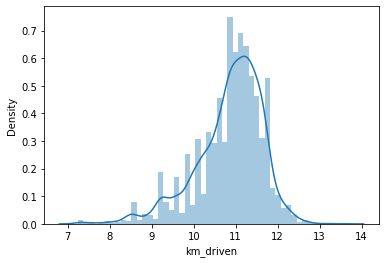

In [123]:
# Checking for the distribution of the data after dropping outliers

sns.distplot(X['km_driven'])

Well, it is much better than previous distribution 

In [124]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,11.156251,Petrol,Individual,Manual,First Owner
1,2007,10.819778,Petrol,Individual,Manual,First Owner
2,2012,11.512925,Diesel,Individual,Manual,First Owner
3,2017,10.736397,Petrol,Individual,Manual,First Owner
4,2014,11.856515,Diesel,Individual,Manual,Second Owner


In [135]:
#  Now we will have to deal with categorical columns 

for cols in X.columns:
  if type(dataset[cols][0]) == str:
    print(dataset[cols].value_counts(),"\n\n")

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 


Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64 


Manual       3892
Automatic     448
Name: transmission, dtype: int64 


First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64 




In [126]:
# Removing the row with fuel type as electricity as it is underrepresented

y.drop(X[X['fuel']=="Electric"].index, axis=0, inplace=True)
X.drop(X[X['fuel']=="Electric"].index, axis=0, inplace=True)

In [142]:
# Let us one-hot encode the categorical data 

X = pd.get_dummies(X, drop_first=True)

In [143]:
# Since we are going to train the data on Random Forest Regressor, we do not have to scale/normalize it. 

# Splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split 


train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=69, test_size=25)

In [144]:
# BUILING THE MODEL 

# Importing necessary libraries

import sklearn 

from sklearn.ensemble import RandomForestRegressor

In [159]:
rf_model = RandomForestRegressor() 

In [221]:
params = {
    'n_estimators' :[int(x) for x in np.linspace(100,1000,50)],
    'max_depth': [int(x) for x in np.linspace(10,190,10)]}

In [222]:
from sklearn.model_selection import RandomizedSearchCV

In [223]:
rf_model_ = RandomizedSearchCV(estimator = rf_model, param_distributions = params ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [224]:
rf_model_.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................max_depth=150, n_estimators=302; total time=   1.9s
[CV] END ....................max_depth=150, n_estimators=302; total time=   1.9s
[CV] END ....................max_depth=150, n_estimators=302; total time=   1.9s
[CV] END ....................max_depth=150, n_estimators=302; total time=   1.9s
[CV] END ....................max_depth=150, n_estimators=302; total time=   1.9s
[CV] END .....................max_depth=30, n_estimators=522; total time=   3.2s
[CV] END .....................max_depth=30, n_estimators=522; total time=   3.2s
[CV] END .....................max_depth=30, n_estimators=522; total time=   3.2s
[CV] END .....................max_depth=30, n_estimators=522; total time=   3.2s
[CV] END .....................max_depth=30, n_estimators=522; total time=   3.2s
[CV] END ....................max_depth=150, n_estimators=540; total time=   3.3s
[CV] END ....................max_depth=150, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 30, 50, 70, 90, 110,
                                                      130, 150, 170, 190],
                                        'n_estimators': [100, 118, 136, 155,
                                                         173, 191, 210, 228,
                                                         246, 265, 283, 302,
                                                         320, 338, 357, 375,
                                                         393, 412, 430, 448,
                                                         467, 485, 504, 522,
                                                         540, 559, 577, 595,
                                                         614, 632, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [226]:
rf_model_.best_params_

{'max_depth': 50, 'n_estimators': 173}

In [228]:
model = rf_model_.best_estimator_

In [231]:
score = mean_squared_error(test_y,model.predict(test_X))

74032785130.76482